In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [15]:
data = pd.read_excel("cases-brazil.xlsx")

In [16]:
data['logInfections'] = np.log(data.Infections)
data.tail()

,Date,Infections,Time,logInfections
21,2020-03-17,346,22,5.846439
22,2020-03-18,529,23,6.270988
23,2020-03-19,640,24,6.461468
24,2020-03-20,970,25,6.877296
25,2020-03-21,1178,26,7.071573


In [17]:
X = data.Time
X = sm.add_constant(X)

In [18]:
y = data.logInfections

In [19]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1410.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           7.87e-23
Time:                        19:43:49   Log-Likelihood:                -6.1463
No. Observations:                  26   AIC:                             16.29
Df Residuals:                      24   BIC:                             18.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0344      0.129     -8.029      0.0

In [20]:
log_alpha = math.exp(res.params[0])
log_beta = math.exp(res.params[1])
print(log_alpha)
print(log_beta)

0.35544916380604535
1.3677781278326577


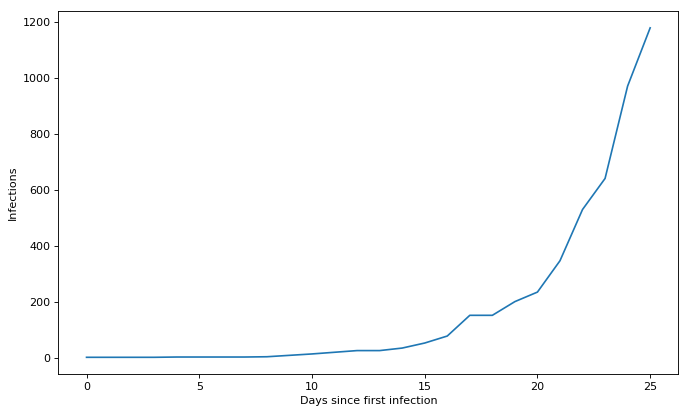

In [21]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data['Infections'])
plt.ylabel('Infections')
plt.xlabel('Days since first infection')
plt.show()

In [22]:
last_day = data['Time'].iloc[-1]

In [23]:
# Dia desde o primeiro contato
day = 31

In [24]:
predictions = []
time_list = []
for i in range(last_day, day+1):    
    prediction = log_alpha * (log_beta**i)    
    predictions.append(prediction)
    time_list.append(i)

In [25]:
df_predictions = pd.DataFrame(columns=['Infections', 'Time'])
df_predictions['Infections'] = predictions
df_predictions['Time'] = time_list
df_predictions.head()

,Infections,Time
0,1222.318873,26
1,1671.861020,27
2,2286.734936,28
3,3127.746030,29
4,4278.062609,30


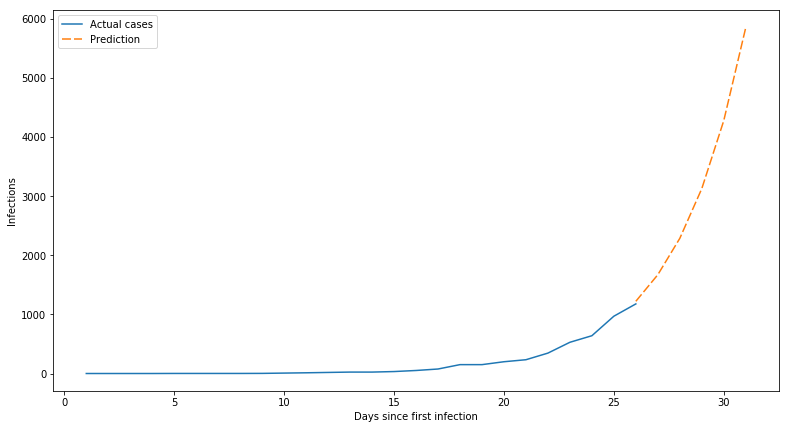

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
line1, = ax.plot(data['Time'], data['Infections'], label='Actual cases')
line2, = ax.plot(df_predictions['Time'], df_predictions['Infections'], dashes=[6, 2], label='Prediction')
ax.legend()
plt.ylabel('Infections')
plt.xlabel('Days since first infection')
plt.show()